# **Understanding the Assumptions of Linear Regression**

 Linear regression, whether simple or multiple, relies on several key assumptions to ensure that the model is valid and produces reliable results. If these assumptions are violated, the model's predictions and interpretations may be incorrect or misleading. Below are the key assumptions of linear regression:



To demonstrate how to check and handle the assumptions of linear regression, I’ll provide a Python example using a synthetic dataset. We will walk through each assumption step by step, using visualization and statistical tests where necessary.



In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Create synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable
y = 2.5 * X + np.random.randn(100, 1) * 2  # Dependent variable with some noise

# Convert to DataFrame for easier manipulation
data = pd.DataFrame(np.hstack((X, y)), columns=["X", "y"])

# Fit the Linear Regression model
model = LinearRegression()
model.fit(data[["X"]], data["y"])

# Make predictions
y_pred = model.predict(data[["X"]])

# Output model parameters
print(f"Slope (m): {model.coef_[0]}")
print(f"Intercept (c): {model.intercept_}")
print(f"R-squared: {r2_score(data['y'], y_pred)}")


Slope (m): 2.4080453545753935
Intercept (c): 0.4301923150934943
R-squared: 0.9402877892004072


# **1. Linearity**

*   Definition: There is a linear relationship between the dependent variable and the independent variable(s).
*   Implication: The change in the dependent variable is proportional to the change in the independent variable(s).
*   Violation: If the relationship is non-linear (e.g., exponential or polynomial), a linear regression model will not fit the data well, leading to inaccurate predictions.



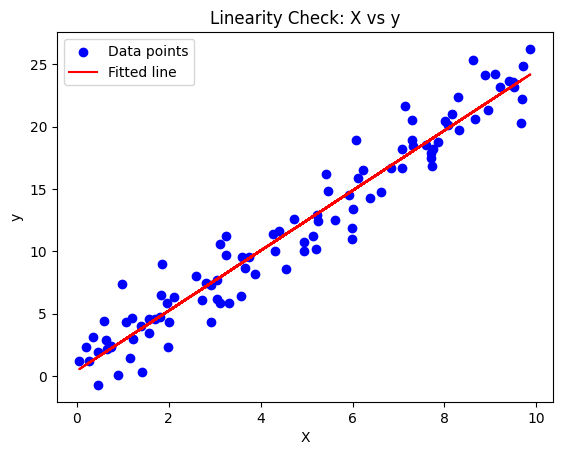

In [ ]:
# Scatter plot of X vs y
plt.scatter(data["X"], data["y"], color="blue", label="Data points")
plt.plot(data["X"], y_pred, color="red", label="Fitted line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linearity Check: X vs y")
plt.legend()
plt.show()



# **2. Independence of Errors (No Autocorrelation)**

*   Definition: The residuals (errors) are independent of each other.
*   Implication: There is no pattern or correlation between residuals; they should be random.
*   Violation: If the residuals are correlated (autocorrelation), this indicates that the model is missing an important variable or time-dependent patterns, especially in time-series data. Durbin-Watson test is commonly used to detect autocorrelation.






The Durbin-Watson Test is used to detect autocorrelation(Relation between Residuals).The value of the Durbin-Watson statistic range from 0 to 4.
1. the value near 2 indicated no autocorrelation.
2. the value towards 0 indicate positive correlation.
3. the value towards 4 indicate negative correlation.

In [ ]:

# Calculate Durbin-Watson statistic
residuals = data["y"] - y_pred
dw_stat = sm.stats.durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 2.284997603729668


A Durbin-Watson statistic of 2.28 is slightly greater than 2, which suggests that there is no significant autocorrelation in your residuals. This value is very close to the ideal value of 2, indicating that the residuals are largely independent of each other, which is good for your linear regression model.



Residuals should not be correlated. We also can check this visually using a residual plot.

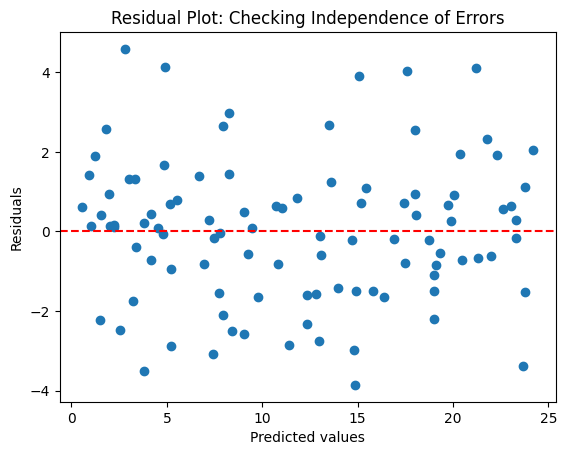

In [ ]:
# Residual plot
residuals = data["y"] - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot: Checking Independence of Errors")
plt.show()


 In this plot, the residuals should be scattered randomly around 0. If there’s any discernible pattern (e.g., funnel shape), the independence assumption may be violated.



# **3. Homoscedasticity**

We want to check if the residuals have constant variance. This can also be visualized using the residual plot (same as above). In addition, we can perform a statistical test like the Breusch-Pagan test.



*   Definition: The residuals have constant variance across all levels of the independent variables.
*   Implication: The spread of residuals should be consistent, and not increase or decrease as the independent variable changes.
*   Violation: If the residuals show increasing or decreasing spread (heteroscedasticity), it indicates that the model's error terms do not have constant variance. This can lead to inefficient estimates. A plot of residuals vs. predicted values can be used to check for homoscedasticity.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Add a constant to the independent variable (X) for the intercept term
X_with_const = sm.add_constant(data[["X"]])  # Adds a column of ones for the intercept

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_with_const)

# Output the p-value of the test (bp_test[1] is the p-value)
print(f"Breusch-Pagan test p-value: {bp_test[1]}")


Breusch-Pagan test p-value: 0.9063620066281555


A high p-value indicates that there is no evidence of heteroscedasticity (i.e., the residuals have constant variance).
The output will show the p-value. A p-value > 0.05 suggests that homoscedasticity (constant variance of residuals) is not violated.

Handling Heteroscedasticity: Try transforming
y (e.g., log transformation: np.log(y)) or use weighted least squares regression.


# **4. Normality of Errors**

*   Definition: The residuals (errors) should follow a normal distribution.
*   Implication: This assumption is particularly important for making valid statistical inferences, such as hypothesis tests and confidence intervals.
*   Violation: If the errors are not normally distributed, it could affect the validity of confidence intervals and hypothesis tests. This can be assessed using a Q-Q plot or a histogram of the residuals.



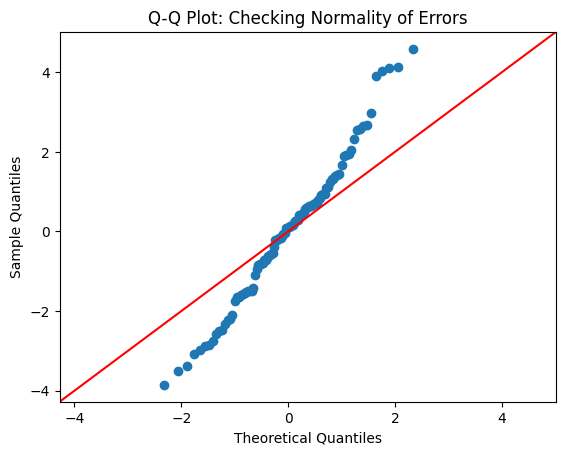

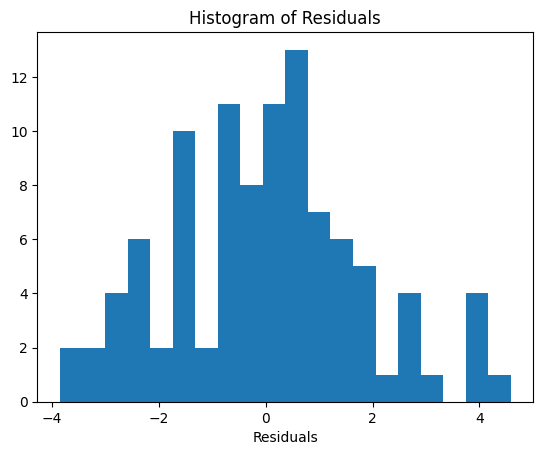

In [ ]:
#Q-Q plot for normality of errors
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot: Checking Normality of Errors")
plt.show()
# Histogram of residuals
plt.hist(residuals,bins=20)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()


In the Q-Q plot, residuals should fall along the straight line if they are normally distributed. The histogram should show a bell-shaped curve.




# **5. No Multicollinearity (for Multiple Linear Regression)**

The no multicollinearity assumption in multiple linear regression implies that the predictor variables (independent variables) are not highly correlated with each other. When multicollinearity exists, it becomes difficult to determine the individual impact of each predictor on the target variable because they share similar information, leading to unstable and unreliable coefficient estimates.

Detecting Multicollinearity using the correlation matrix.








Correlation Matrix:
          X1        X2        X3
X1  1.000000  0.992798 -0.036512
X2  0.992798  1.000000 -0.051432
X3 -0.036512 -0.051432  1.000000


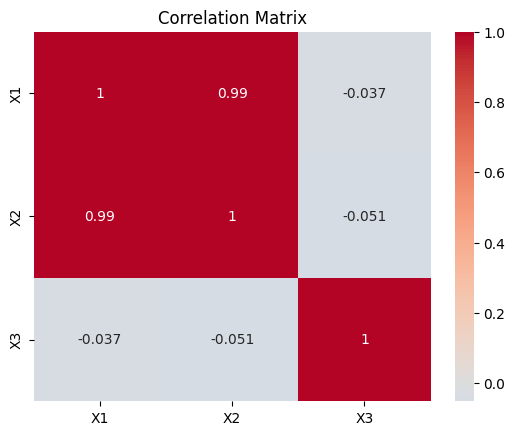

In [ ]:
# Create a sample dataset with multicollinearity
np.random.seed(0)
X1 = np.random.rand(100)
X2 = 0.8 * X1 + np.random.rand(100) * 0.1  # Highly correlated with X1
X3 = np.random.rand(100)  # Not correlated with X1 or X2
y = 3 * X1 + 2 * X3 + np.random.rand(100)  # Target variable

# Construct a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})
# Check the correlation matrix
correlation_matrix = data[['X1', 'X2', 'X3']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()


This high correlation between X1 and X2 is a sign of multicollinearity, which can be problematic in linear regression models. Multicollinearity makes it difficult to isolate the individual effects of the correlated variables on the target variable (y). It can lead to unstable coefficient estimates and make it harder to interpret the model's results.

Handling Multicollinearity: Remove or combine variables, or use regularization methods like Ridge or Lasso regression to minimize multicollinearity’s impact on model performance.


# **6. No Measurement Error in Predictors**

The model assumes that the independent variables are measured without error. Measurement errors in the independent variables can bias the results. It’s challenging to assess this directly. You could look at reliability metrics or use reliable measurement tools.




# **Overall:**

By understanding and verifying the assumptions of linear regression, data scientists can build more robust and reliable models that provide meaningful insights and accurate predictions. The techniques and tools presented above serve as a valuable foundation for conducting thorough linear regression analysis.